In [18]:
%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(5,5)

#reading data
data =pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [14]:
X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values

In [19]:
mean_x =np.mean(X)
mean_y =np.mean(Y)

#total no. of values
m=len(X)

num=0
den=0
for i in range(m):
    num+= (X[i]-mean_x)*(Y[i]-mean_y)
    den+= (X[i]-mean_x)**2
#slope of Regression line 
b1=num/den
#calculation of constant C in y=mx+c
b0=mean_y -(b1*mean_x)

#print coefficents
print(b1,b0)


0.26342933948939945 325.57342104944223


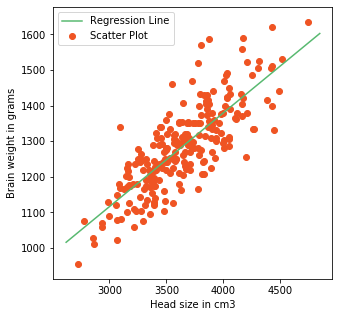

In [24]:
#comparing it with eq of line y=mx +c
#m=0.26 that is b1 and C =325.57 that is b0

#plotting values and regression line
max_x = np.max(X)+100
min_x =np.min(X) -100

#calcuating line values x and y
x=np.linspace(min_x,max_x,1000)
y=b0+b1*x

#plotting line
plt.plot(x,y,color='#58b970',label='Regression Line')



#plotting Scatter points
plt.scatter(X,Y,c='#ef5423',label='Scatter Plot')

plt.xlabel('Head size in cm3')
plt.ylabel('Brain weight in grams')
plt.legend()
plt.show()



In [25]:
up=0
down=0
for i in range(m):
    y_pred=b0+b1*X[i]
    up += (y_pred - Y[i])**2
    down+= (Y[i] - mean_y)**2
r2=1-(up/down)
print(r2)


0.6393117199570003


In [26]:
#using scikit learn library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = X.reshape((m,1))
#creating model
reg=LinearRegression()
#fitting training data

reg=reg.fit(X,Y)

# Y prediction
Y_pred =reg.predict(X)

#calculating r2 score
r2_score=reg.score(X,Y)

print(r2_score)


0.639311719957
